# 베르누이분포와 이항분포

결과가 두 가지 중 하나로만 나오는 실험이나 시행을 베르누이 시행(Bernoulli trial)이라고 한다. 예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것도 베르누이 시행이다.

베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것을 **베르누이 확률변수(Bernoulli random variable)**라고 한다. 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)다. 베르누이 확률변수의 표본값은 보통 정수 1과 0으로 표현하지만 때로는 정수 1과 -1로 표현하는 경우도 있다.

In [3]:
import scipy as sp
from scipy import stats

In [4]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

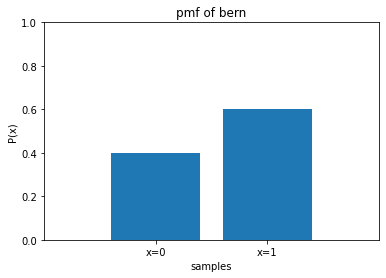

In [6]:
import matplotlib.pyplot as plt

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("samples")
plt.ylabel("P(x)")
plt.title("pmf of bern")
plt.show()

In [15]:
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


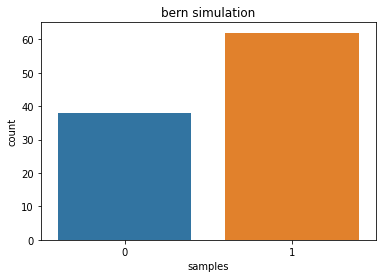

In [16]:
import seaborn as sns
sns.countplot(x)
plt.title("bern simulation")
plt.xlabel("samples")
plt.show()

In [18]:
import numpy as np
import pandas as pd
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,theory,simulation
0,0.4,0.38
1,0.6,0.62


In [19]:
df2 = df.stack().reset_index()
df2.columns = ["samples", "type", "ratio"]
df2

,samples,type,ratio
0,0,theory,0.40
1,0,simulation,0.38
2,1,theory,0.60
3,1,simulation,0.62


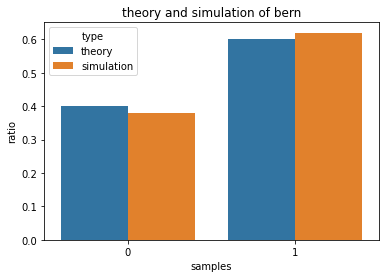

In [20]:
sns.barplot(x="samples", y="ratio", hue="type", data=df2)
plt.title("theory and simulation of bern")
plt.show()

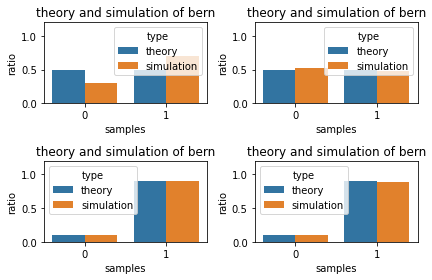

In [22]:
def plot_bernoulli(mu, M):
    rv = sp.stats.bernoulli(mu)
    x = rv.rvs(M, random_state=0)
    y = np.bincount(x, minlength=2) / float(len(x))
    xx = [0, 1]
    df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y})
    df.index = [0, 1]
    df2 = df.stack().reset_index()
    df2.columns = ["samples", "type", "ratio"]
    sns.barplot(x="samples", y="ratio", hue="type", data=df2)
    plt.title("theory and simulation of bern")
    plt.ylim(0, 1.2)
    
plt.subplot(221)
plot_bernoulli(0.5, 10)

plt.subplot(222)
plot_bernoulli(0.5, 1000)

plt.subplot(223)
plot_bernoulli(0.9, 10)

plt.subplot(224)
plot_bernoulli(0.9, 1000)

plt.tight_layout()
plt.show()

In [24]:
np.mean(x)

0.62

In [26]:
np.var(x, ddof=1)

0.23797979797979804

In [27]:
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

In [28]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

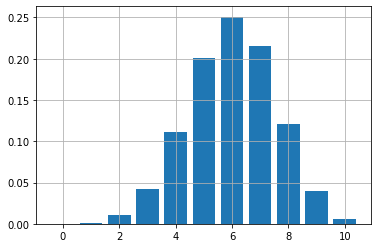

In [34]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align = "center")
plt.grid()
plt.show()

In [35]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


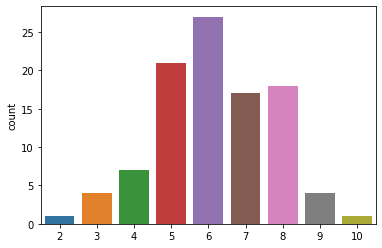

In [36]:
sns.countplot(x)
plt.show()

In [37]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theory": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["samples", "type", "ratio"]
df.pivot("samples", "type", "ratio")
df

,samples,type,ratio
0,0,theory,0.000105
1,0,simulation,0.000000
2,1,theory,0.001573
3,1,simulation,0.000000
4,2,theory,0.010617
5,2,simulation,0.010000
6,3,theory,0.042467
7,3,simulation,0.040000
8,4,theory,0.111477
9,4,simulation,0.070000


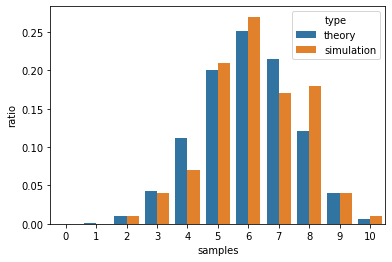

In [38]:
sns.barplot(x = "samples", y = "ratio",hue = "type", data = df)
plt.show()